In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import math

In [2]:
dataSet = pd.read_csv("D:\py projects\Appliance energy prediction\energydata_complete.csv")

# DATA SET

### General Overview

In [3]:
dataSet.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

### Shape of DataSet

In [4]:
dataSet.shape

(19735, 29)

### Information of DataSet

In [5]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

### Descriptive Statistics

In [6]:
dataSet.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

In [7]:
all_column_stats = dataSet.describe()

all_column_stats = all_column_stats.drop(['count', 'min', 'max'])

num_columns = len(all_column_stats.columns)
num_rows = (num_columns - 1) // 3 + 1

fig = make_subplots(rows=num_rows, cols=3, subplot_titles=all_column_stats.columns)
for i, column in enumerate(all_column_stats.columns):
    row_num = i // 3 + 1
    col_num = i % 3 + 1
    
    # Select column statistics
    column_stats = all_column_stats[column]
    
    # Add bar trace to the subplot
    fig.add_trace(
        go.Bar(
            x=column_stats.index,
            y=column_stats.values,
            marker_color=px.colors.qualitative.Set3,
            texttemplate='%{y:.2s}',
            textposition='inside',
        ),
        row=row_num,
        col=col_num,
    )
    
    # Update subplot layout
    fig.update_xaxes(title_text=column, row=row_num, col=col_num)
    fig.update_yaxes(title_text='Values', row=row_num, col=col_num)

# Update layout for the entire figure
fig.update_layout(showlegend=False, height=200 * num_rows, width=900, title_text="Descriptive Statistics")
fig.show()

# EDA

### Univariate Analysis

In [8]:
dataVisual = dataSet.copy()
dataVisual = dataVisual.drop(labels=['date'], axis=1)

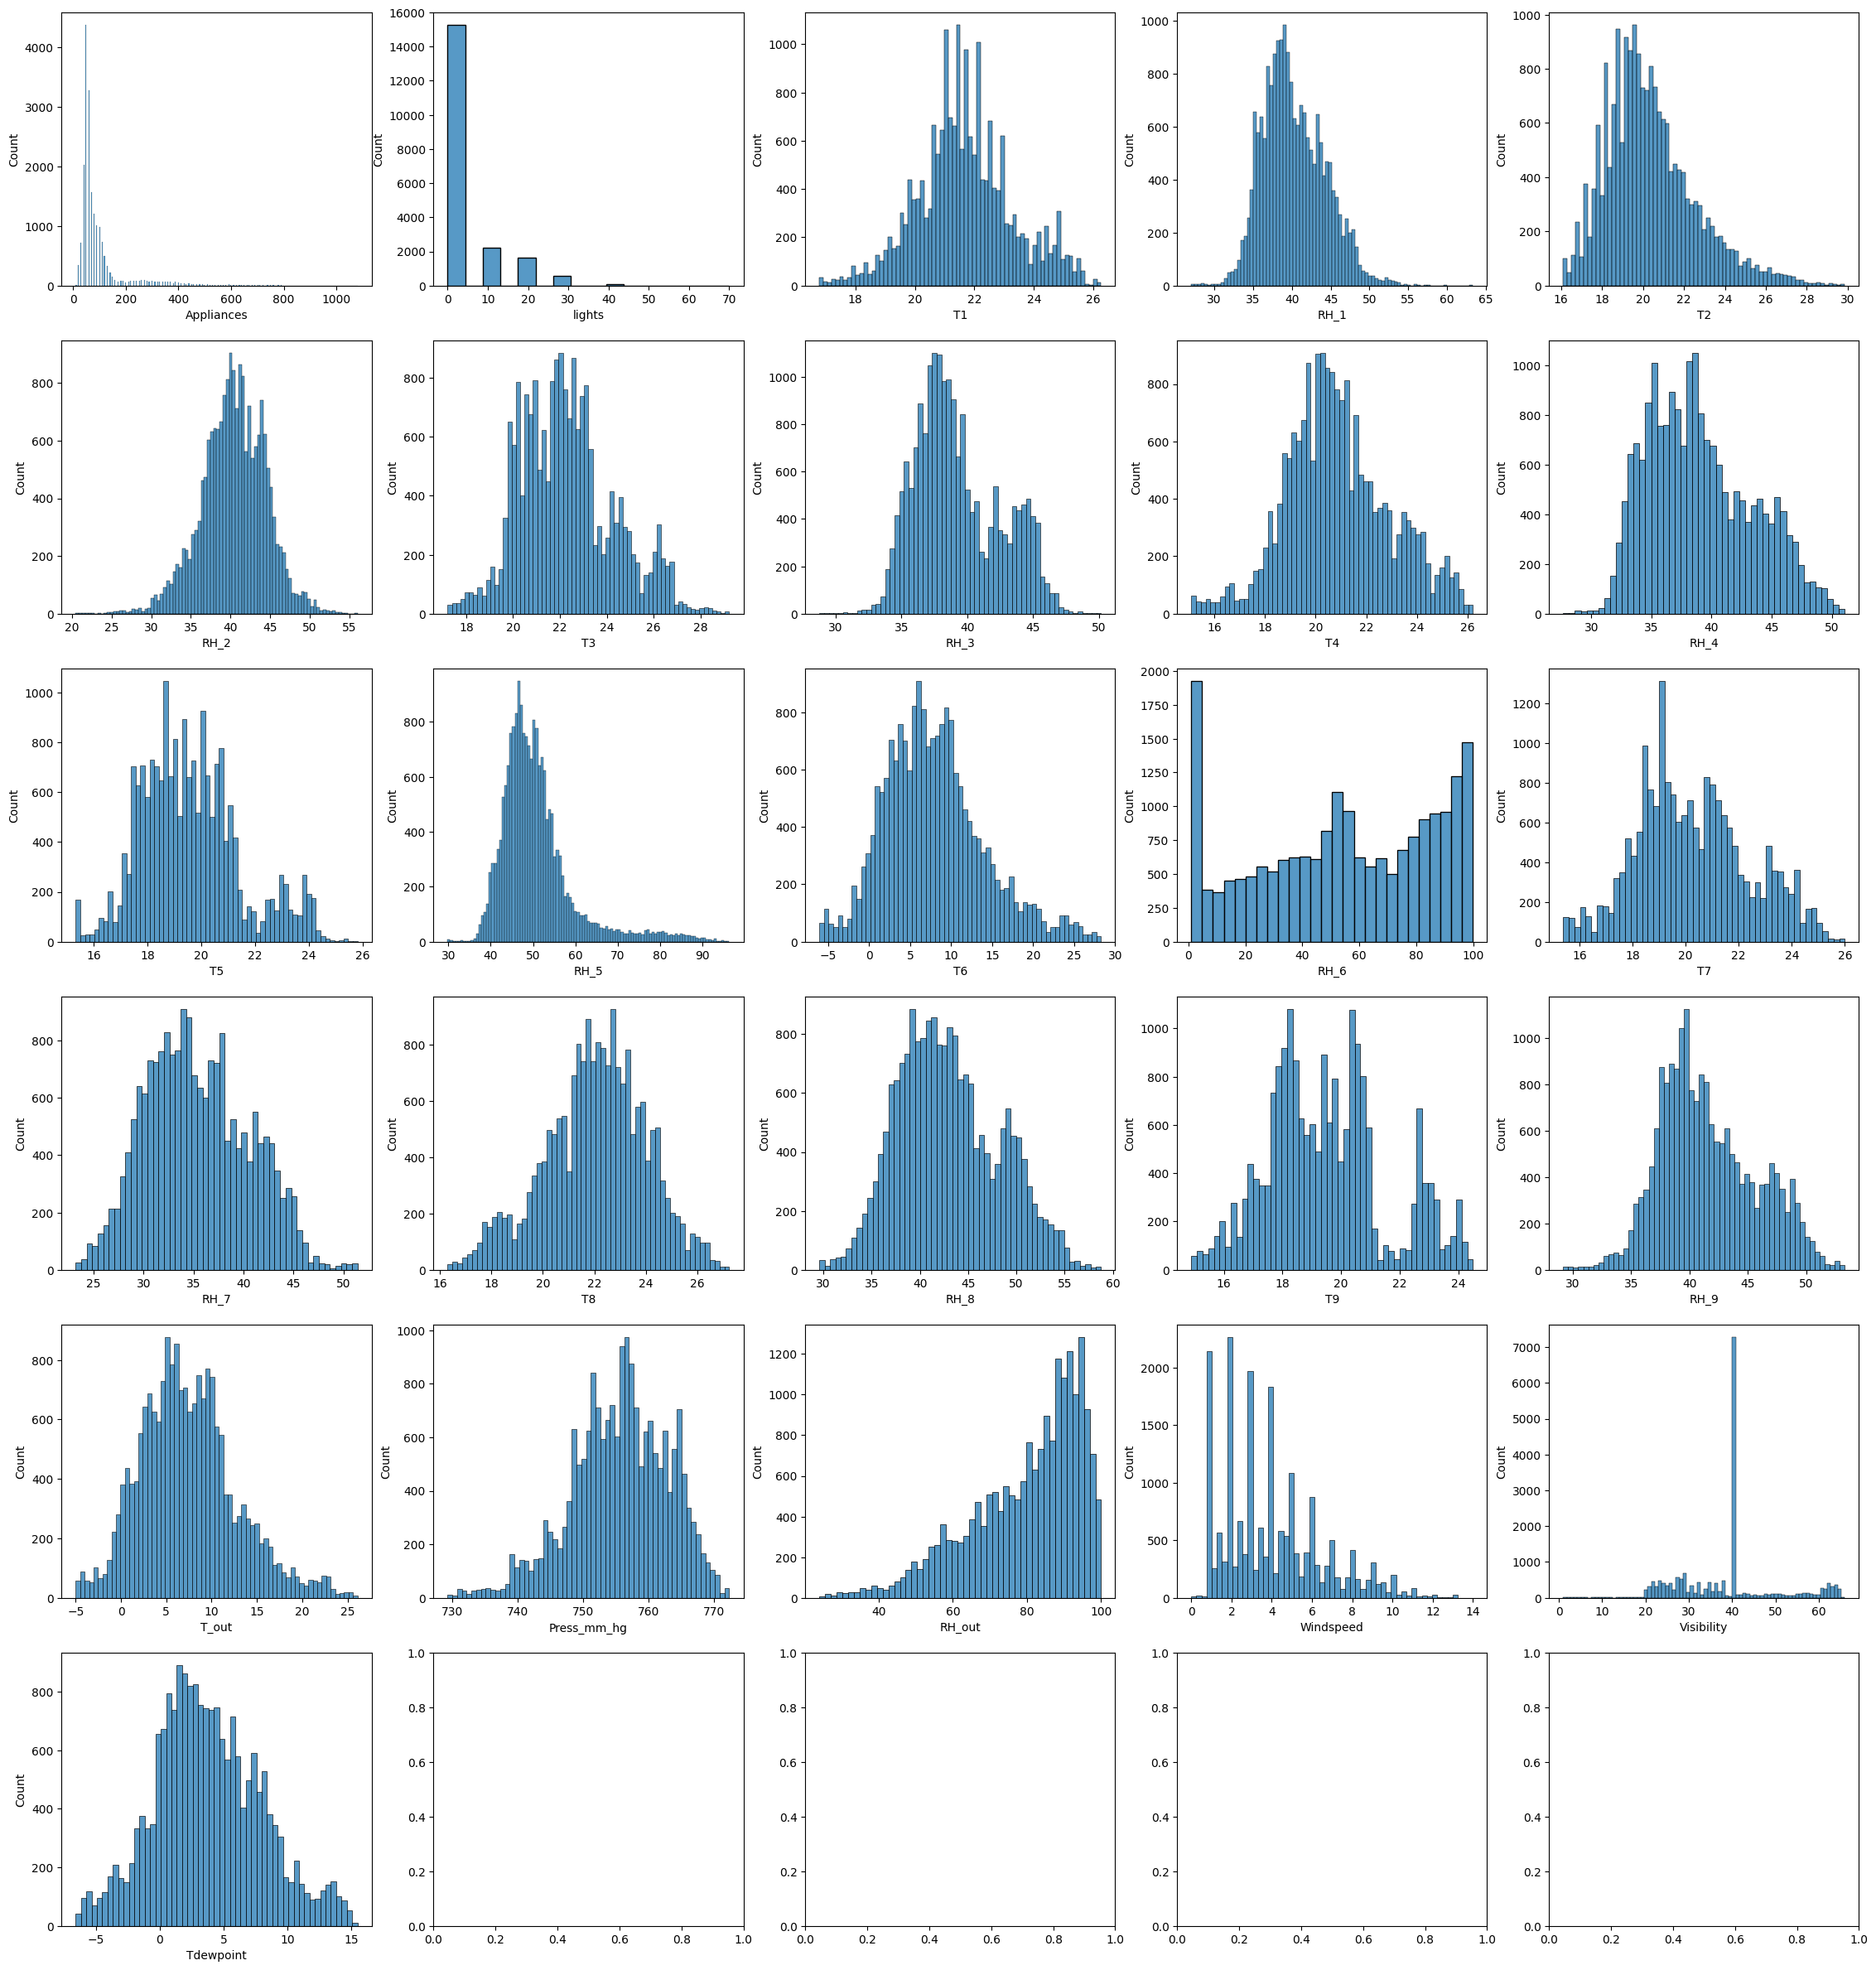

In [9]:
#Histogram plot of every individual column

ls = []
colName = [j for j in dataVisual.columns]
a = 0
while a < 7:
    for i in range(5):
        ls.append((a, i))
    a+=1
fig, ax = plt.subplots(6, 5, figsize=(28, 30))
for k in range(26):
    sns.histplot(ax=ax[ls[k][0], ls[k][1]], x=colName[k], data=dataVisual)
    

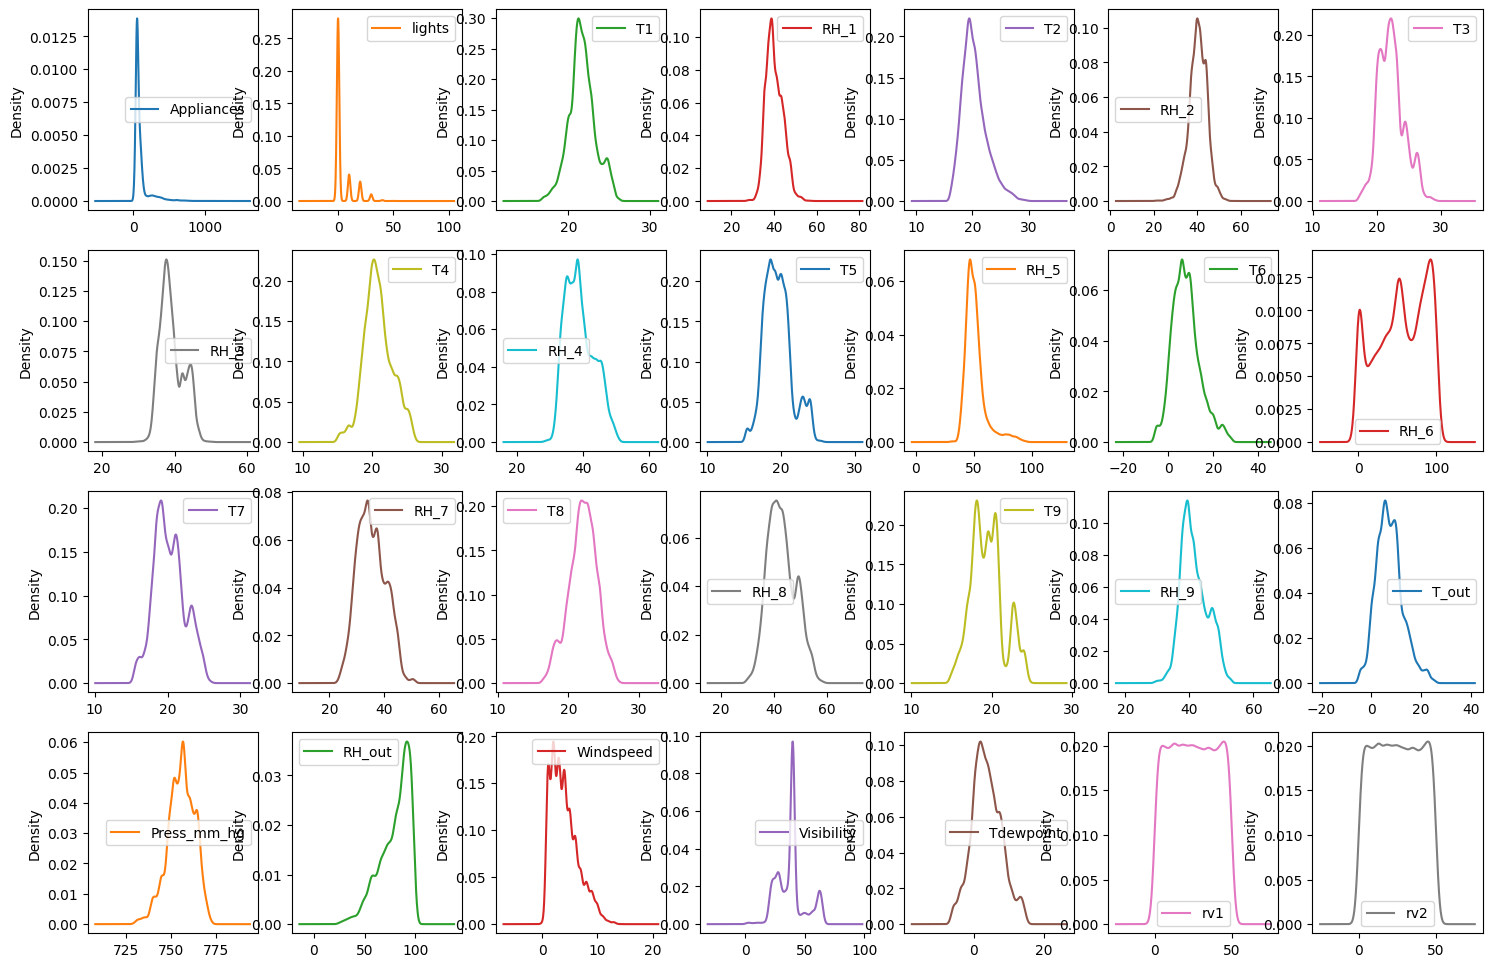

In [10]:
#Distplot of every individual 

dataVisual.plot(kind='density', subplots=True, layout=(4,7), sharex=False,figsize=(18,12))
plt.show()

### Outliers Detection

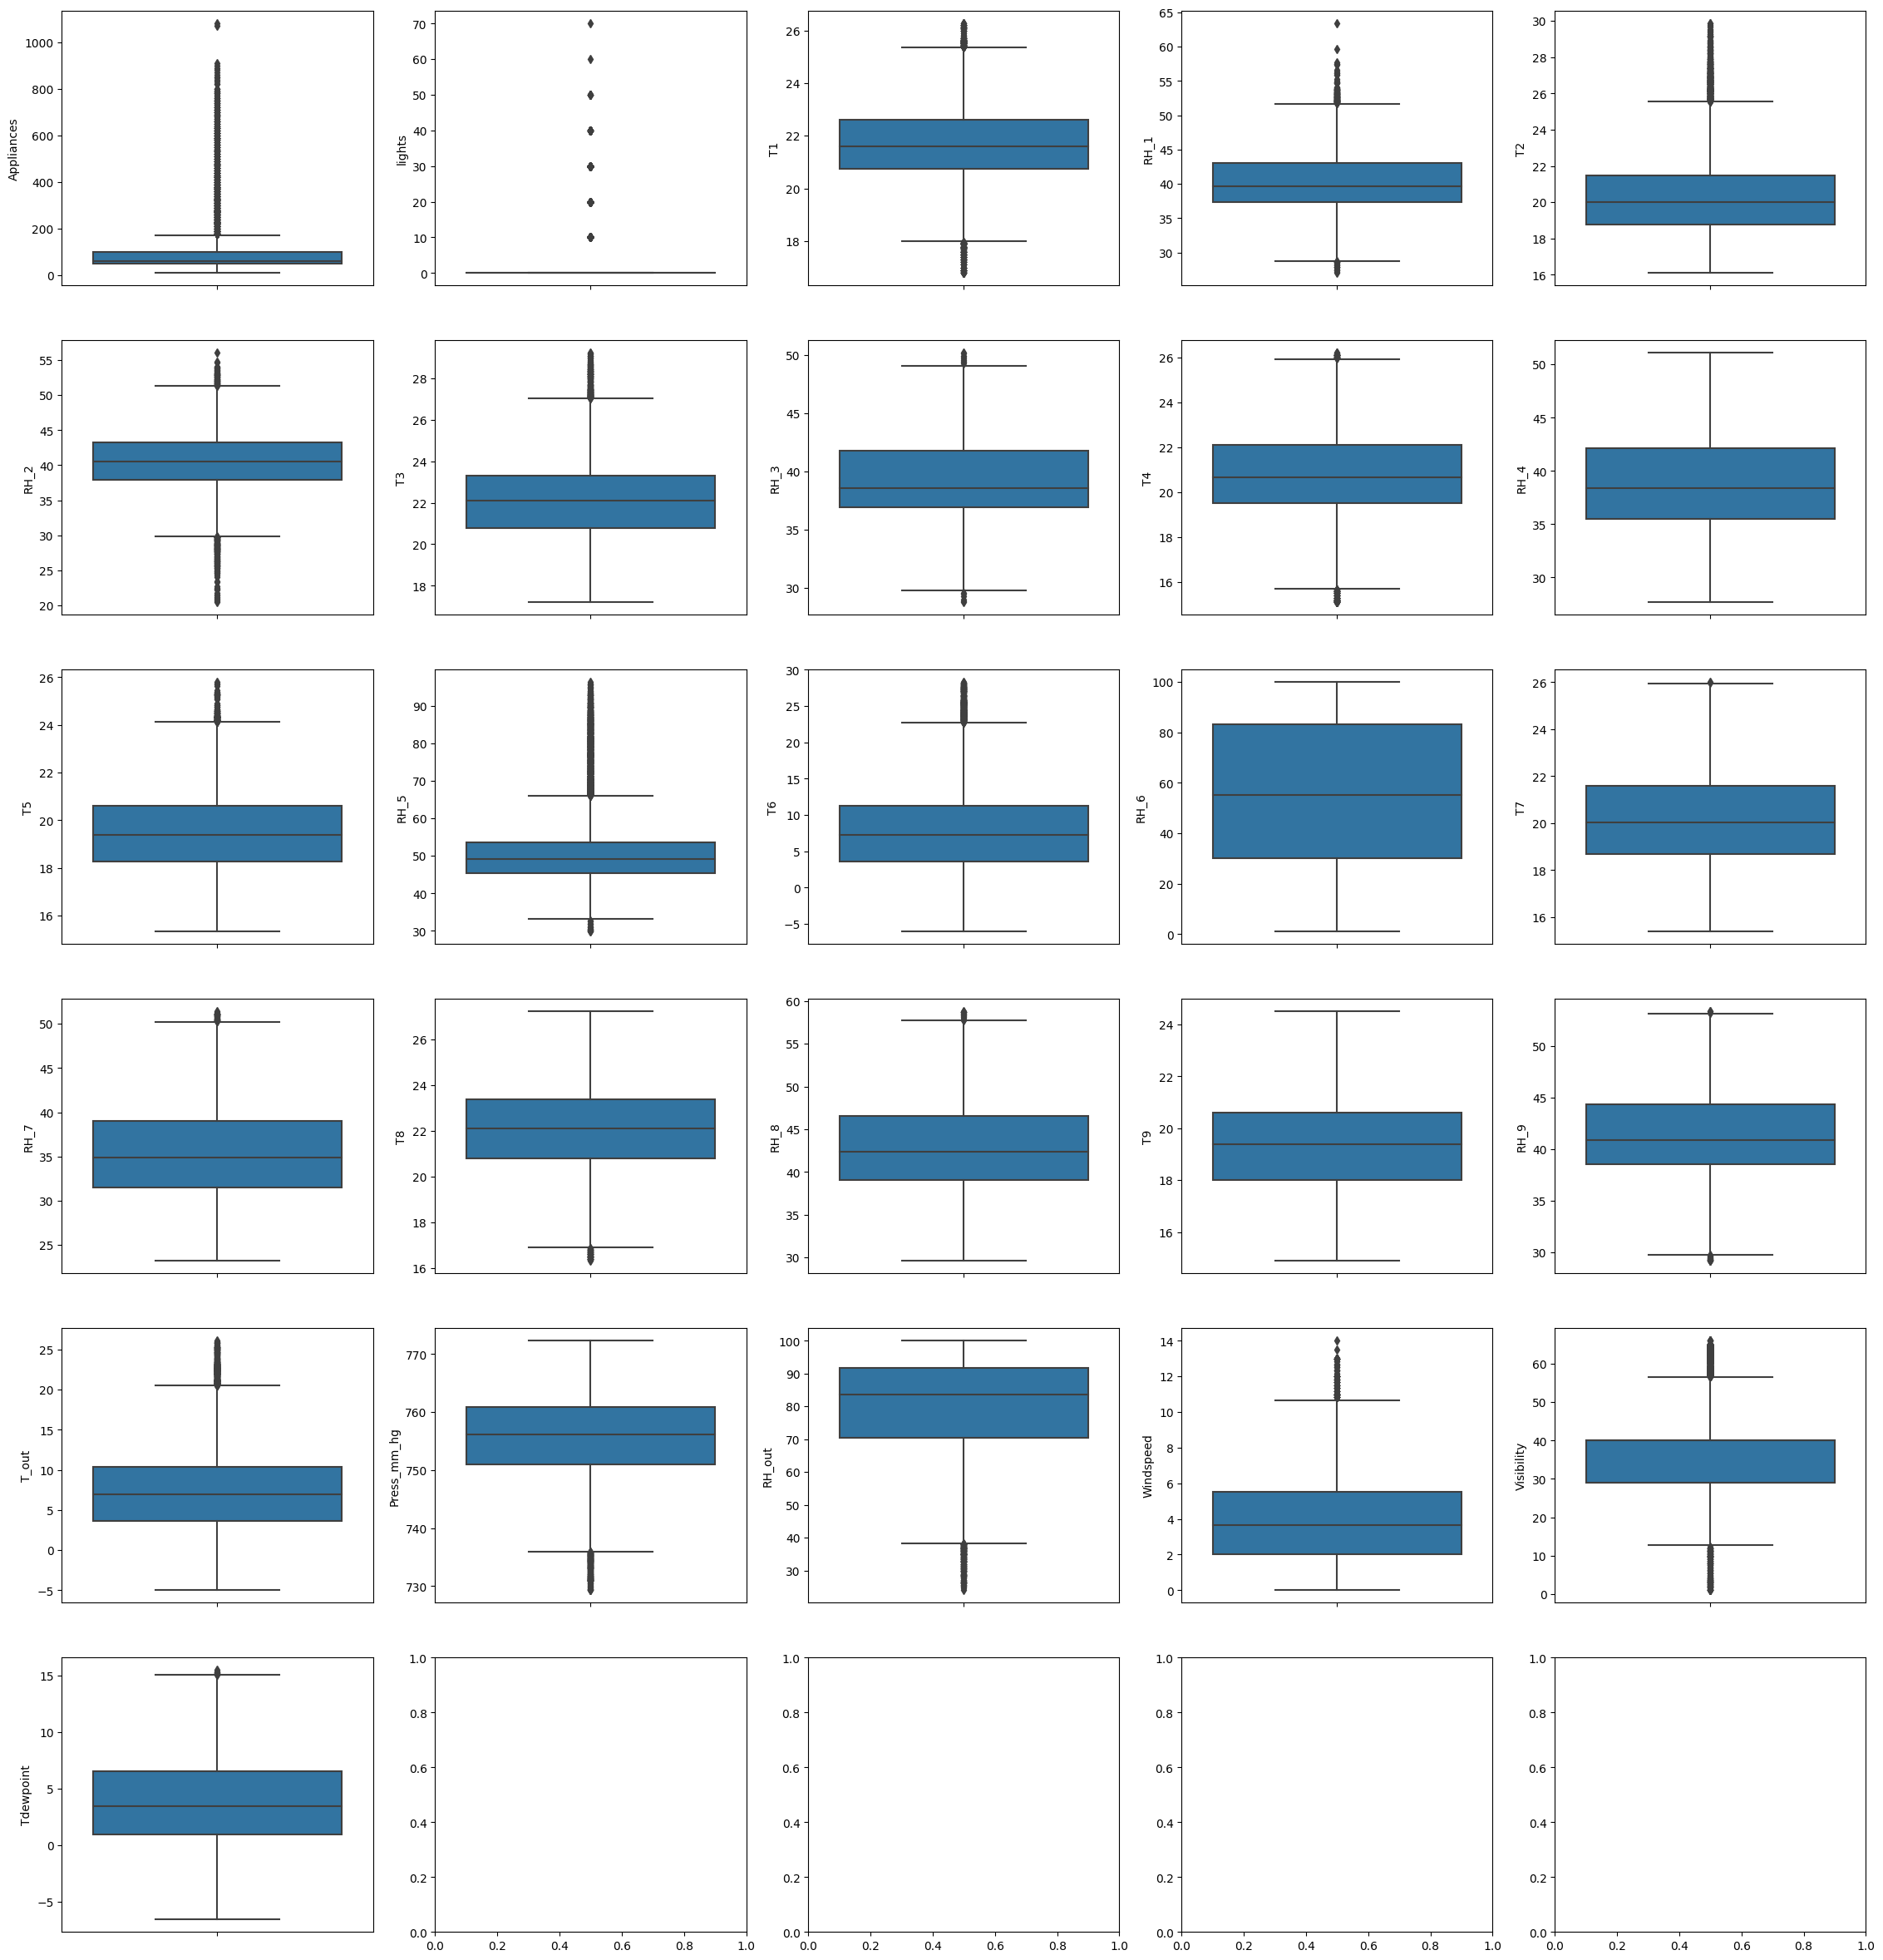

In [11]:
a = 0
while a < 7:
    for i in range(5):
        ls.append((a, i))
    a+=1
fig, ax = plt.subplots(6, 5, figsize=(28, 30))
for k in range(26):
    sns.boxplot(ax=ax[ls[k][0], ls[k][1]], y=colName[k], data=dataVisual)

### Bivariate Analysis

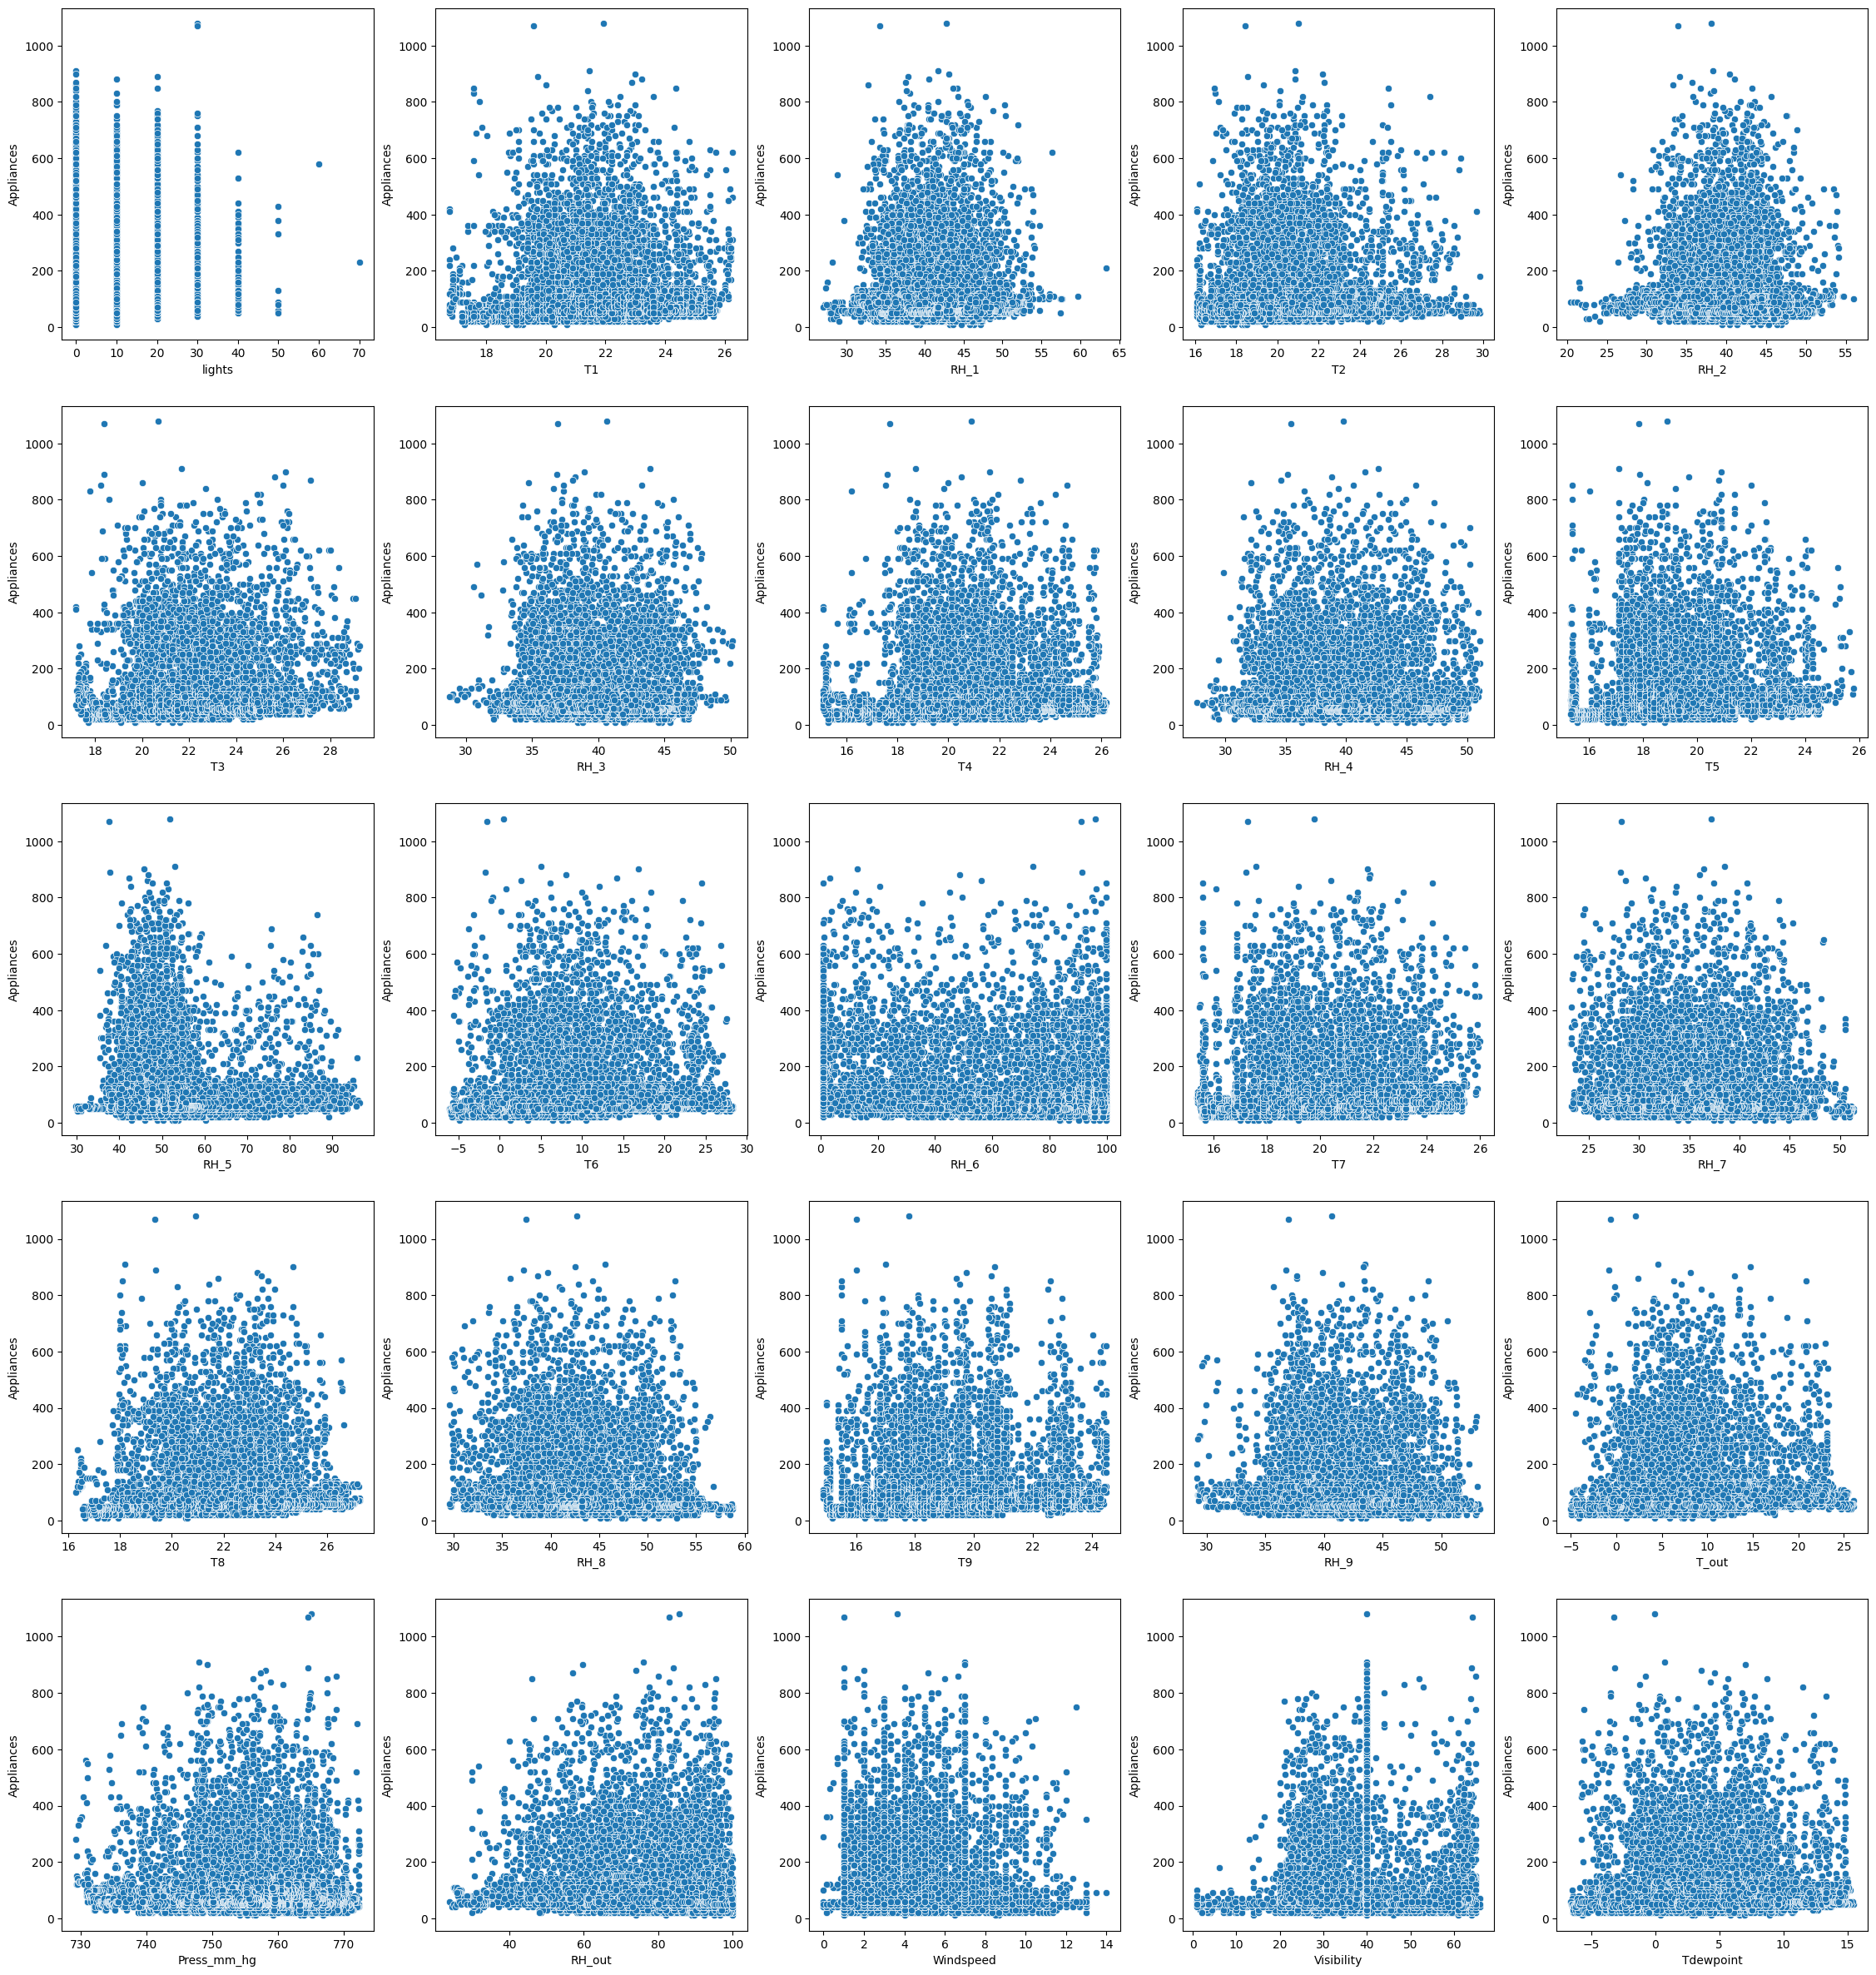

In [12]:
#scatter plot

b = 0
while b < 7:
    for i in range(5):
        ls.append((b, i))
    b+=1
fig, ax = plt.subplots(5, 5, figsize=(28, 30))
for k in range(25):
    sns.scatterplot(ax=ax[ls[k][0], ls[k][1]], x=colName[k+1], y=colName[0], data=dataVisual)

<Axes: >

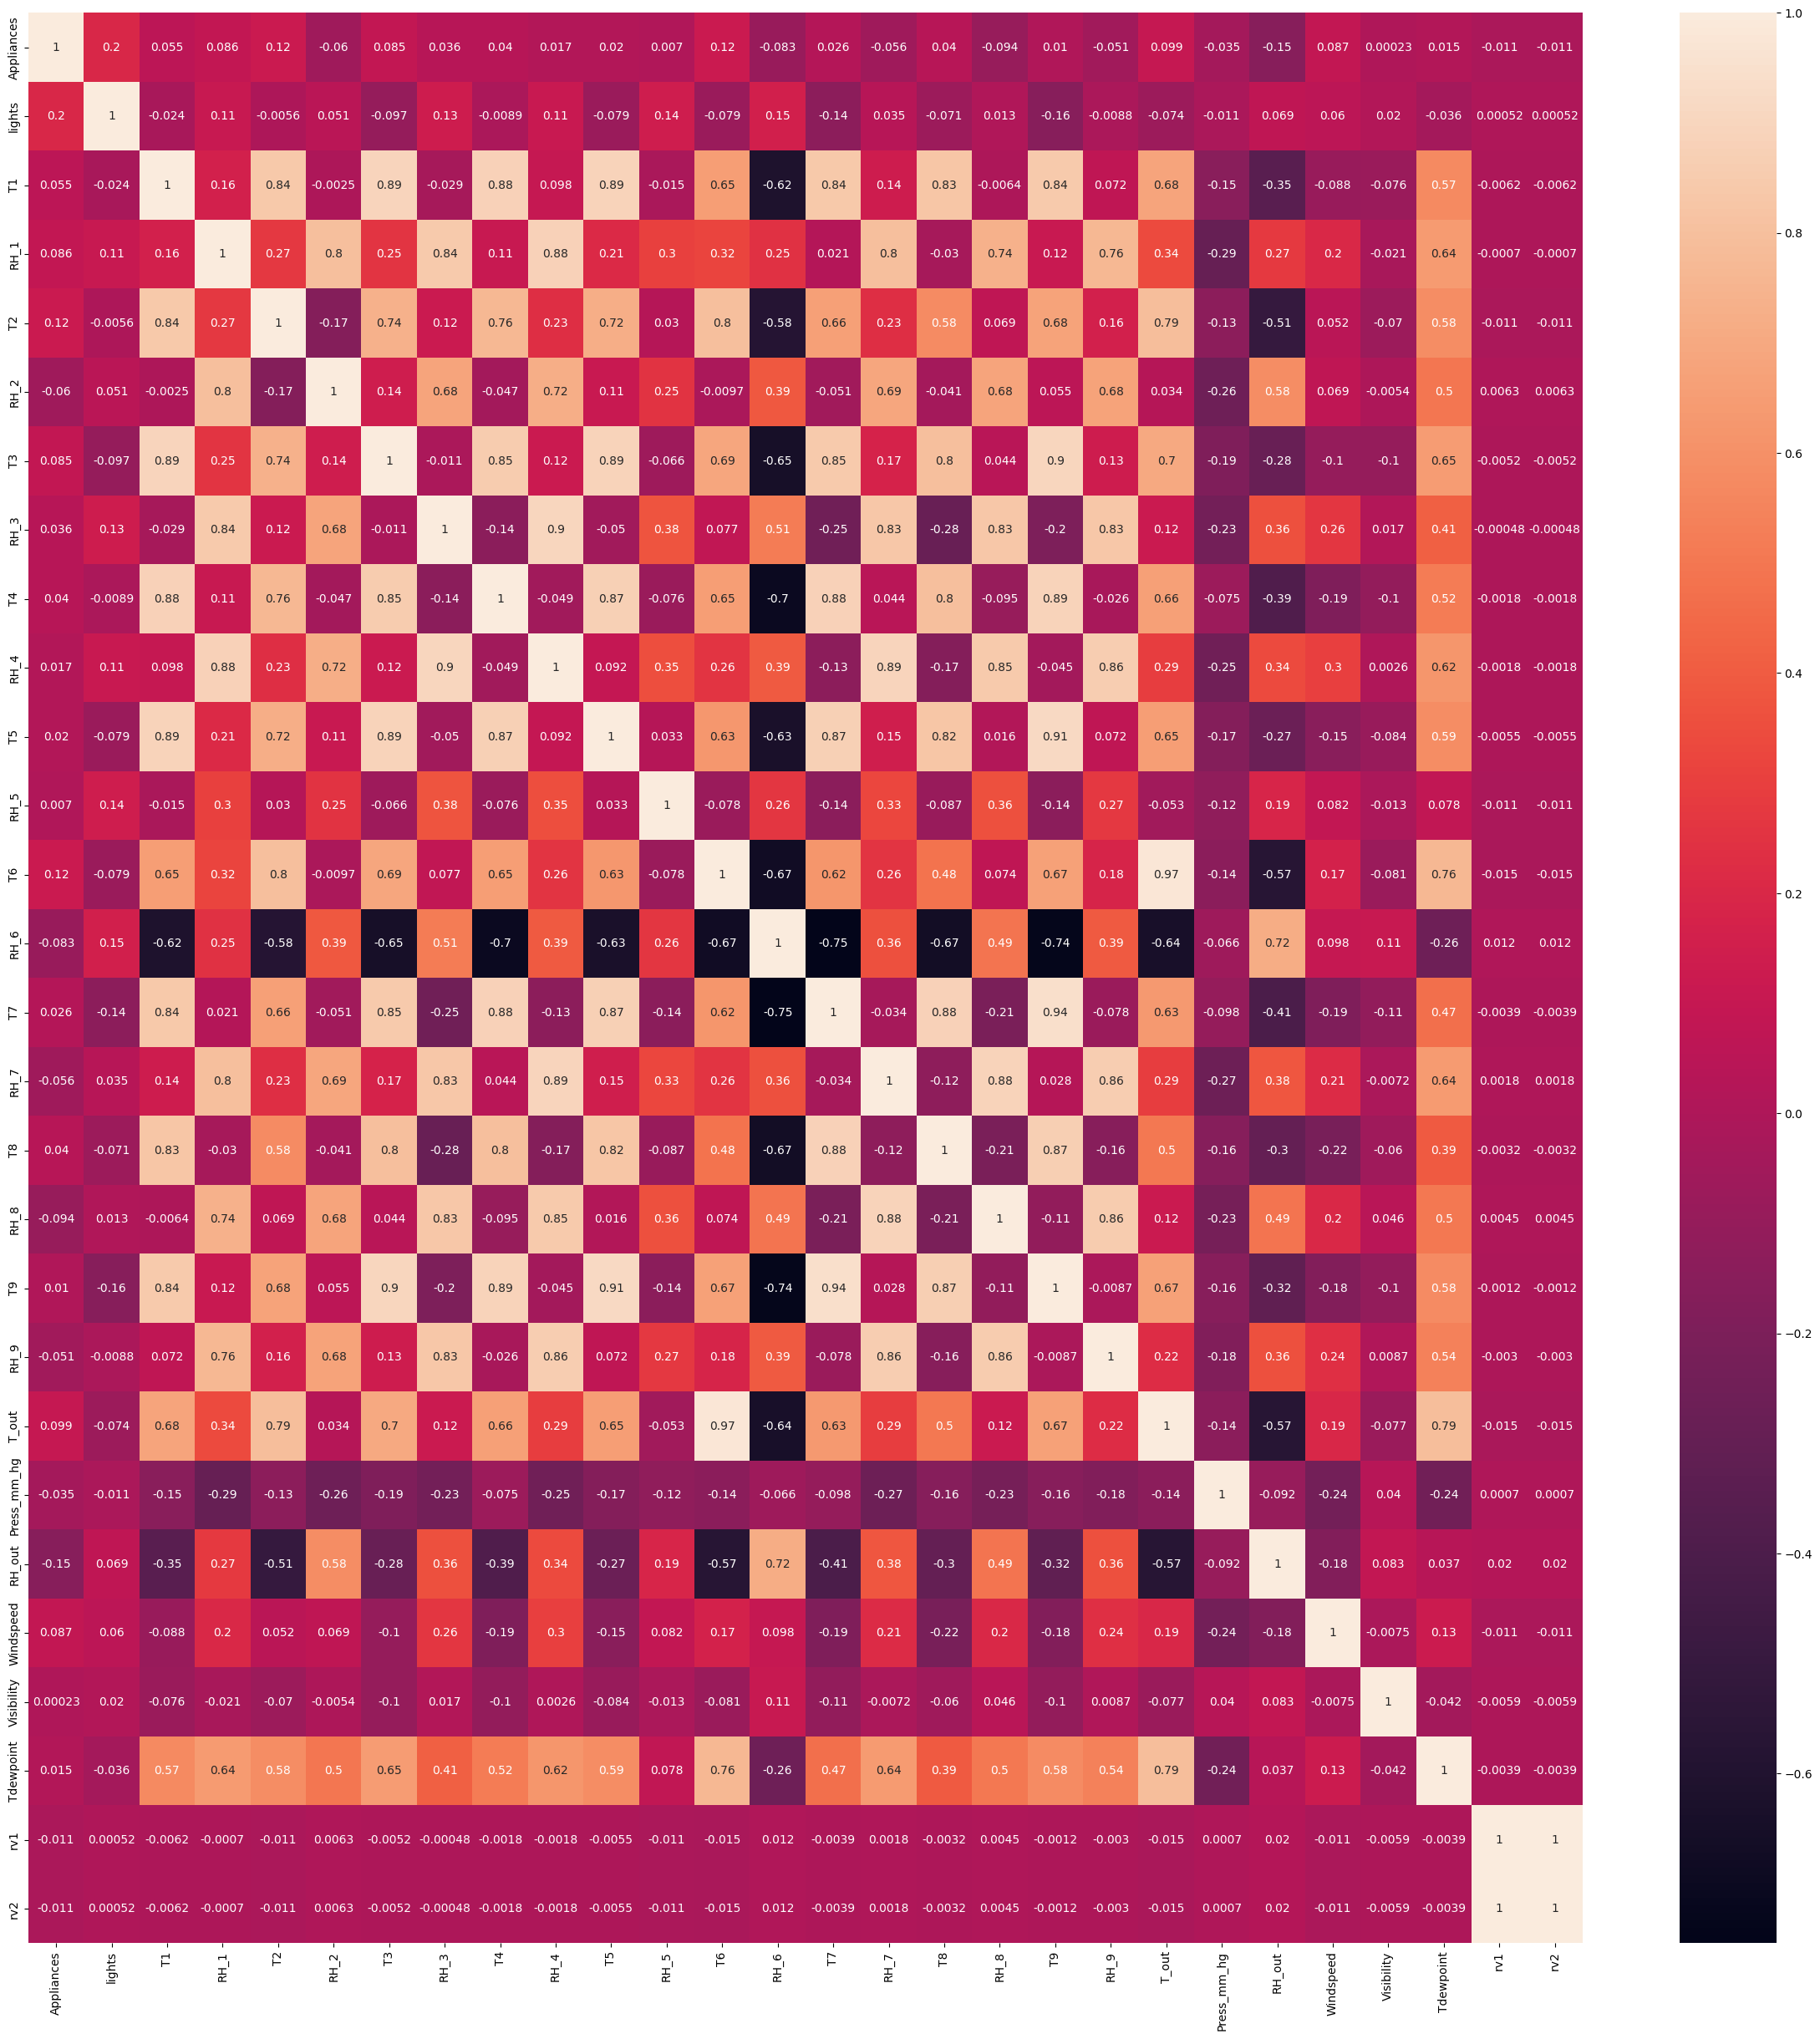

In [13]:
#Heatmap

corr = dataVisual.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True)

### Dropping unwanted columns

In [14]:
dataVisual.drop(['Visibility','rv1','rv2'], axis=1, inplace=True)
dataVisual.head()

Appliances  lights     T1       RH_1    T2       RH_2     T3       RH_3  \
0          60      30  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1          60      30  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2          50      30  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3          50      40  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4          60      40  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4  ...       RH_7    T8       RH_8         T9   RH_9  \
0  19.000000  45.566667  ...  41.626667  18.2  48.900000  17.033333  45.53   
1  19.000000  45.992500  ...  41.560000  18.2  48.863333  17.066667  45.56   
2  18.926667  45.890000  ...  41.433333  18.2  48.730000  17.000000  45.50   
3  18.890000  45.723333  ...  41.290000  18.1  48.590000  17.000000  45.40   
4  18.890000  45.530000  ...  41.230000  18.1  48.590000  17.000000  45.40   

      T_out  Press_mm_hg  RH_out  Windspeed  Tdewpoint  
0  6.600000        733.5    92.0   7.000000        5.3  
1  6.483333        733.6    92.0   6.666667        5.2  
2  6.366667        733.7    92.0   6.333333        5.1  
3  6.250000        733.8    92.0   6.000000        5.0  
4  6.133333        733.9    92.0   5.666667        4.9  

[5 rows x 25 columns]

# Preprocessing Data

### Data Normalization

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataTrans = pd.DataFrame(scaler.fit_transform(dataVisual), columns=dataVisual.columns)
dataTrans.head()

Appliances    lights       T1      RH_1        T2      RH_2        T3  \
0    0.046729  0.428571  0.32735  0.566187  0.225345  0.684038  0.215188   
1    0.046729  0.428571  0.32735  0.541326  0.225345  0.682140  0.215188   
2    0.037383  0.428571  0.32735  0.530502  0.225345  0.679445  0.215188   
3    0.037383  0.571429  0.32735  0.524080  0.225345  0.678414  0.215188   
4    0.046729  0.571429  0.32735  0.531419  0.225345  0.676727  0.215188   

       RH_3        T4      RH_4  ...      RH_7        T8      RH_8        T9  \
0  0.746066  0.351351  0.764262  ...  0.653428  0.173329  0.661412  0.223032   
1  0.748871  0.351351  0.782437  ...  0.651064  0.173329  0.660155  0.226500   
2  0.755569  0.344745  0.778062  ...  0.646572  0.173329  0.655586  0.219563   
3  0.758685  0.341441  0.770949  ...  0.641489  0.164175  0.650788  0.219563   
4  0.758685  0.341441  0.762697  ...  0.639362  0.164175  0.650788  0.219563   

       RH_9     T_out  Press_mm_hg    RH_out  Windspeed  Tdewpoint  
0  0.677290  0.372990     0.097674  0.894737   0.500000   0.538462  
1  0.678532  0.369239     0.100000  0.894737   0.476190   0.533937  
2  0.676049  0.365488     0.102326  0.894737   0.452381   0.529412  
3  0.671909  0.361736     0.104651  0.894737   0.428571   0.524887  
4  0.671909  0.357985     0.106977  0.894737   0.404762   0.520362  

[5 rows x 25 columns]

### Histogram Plot after Normalization

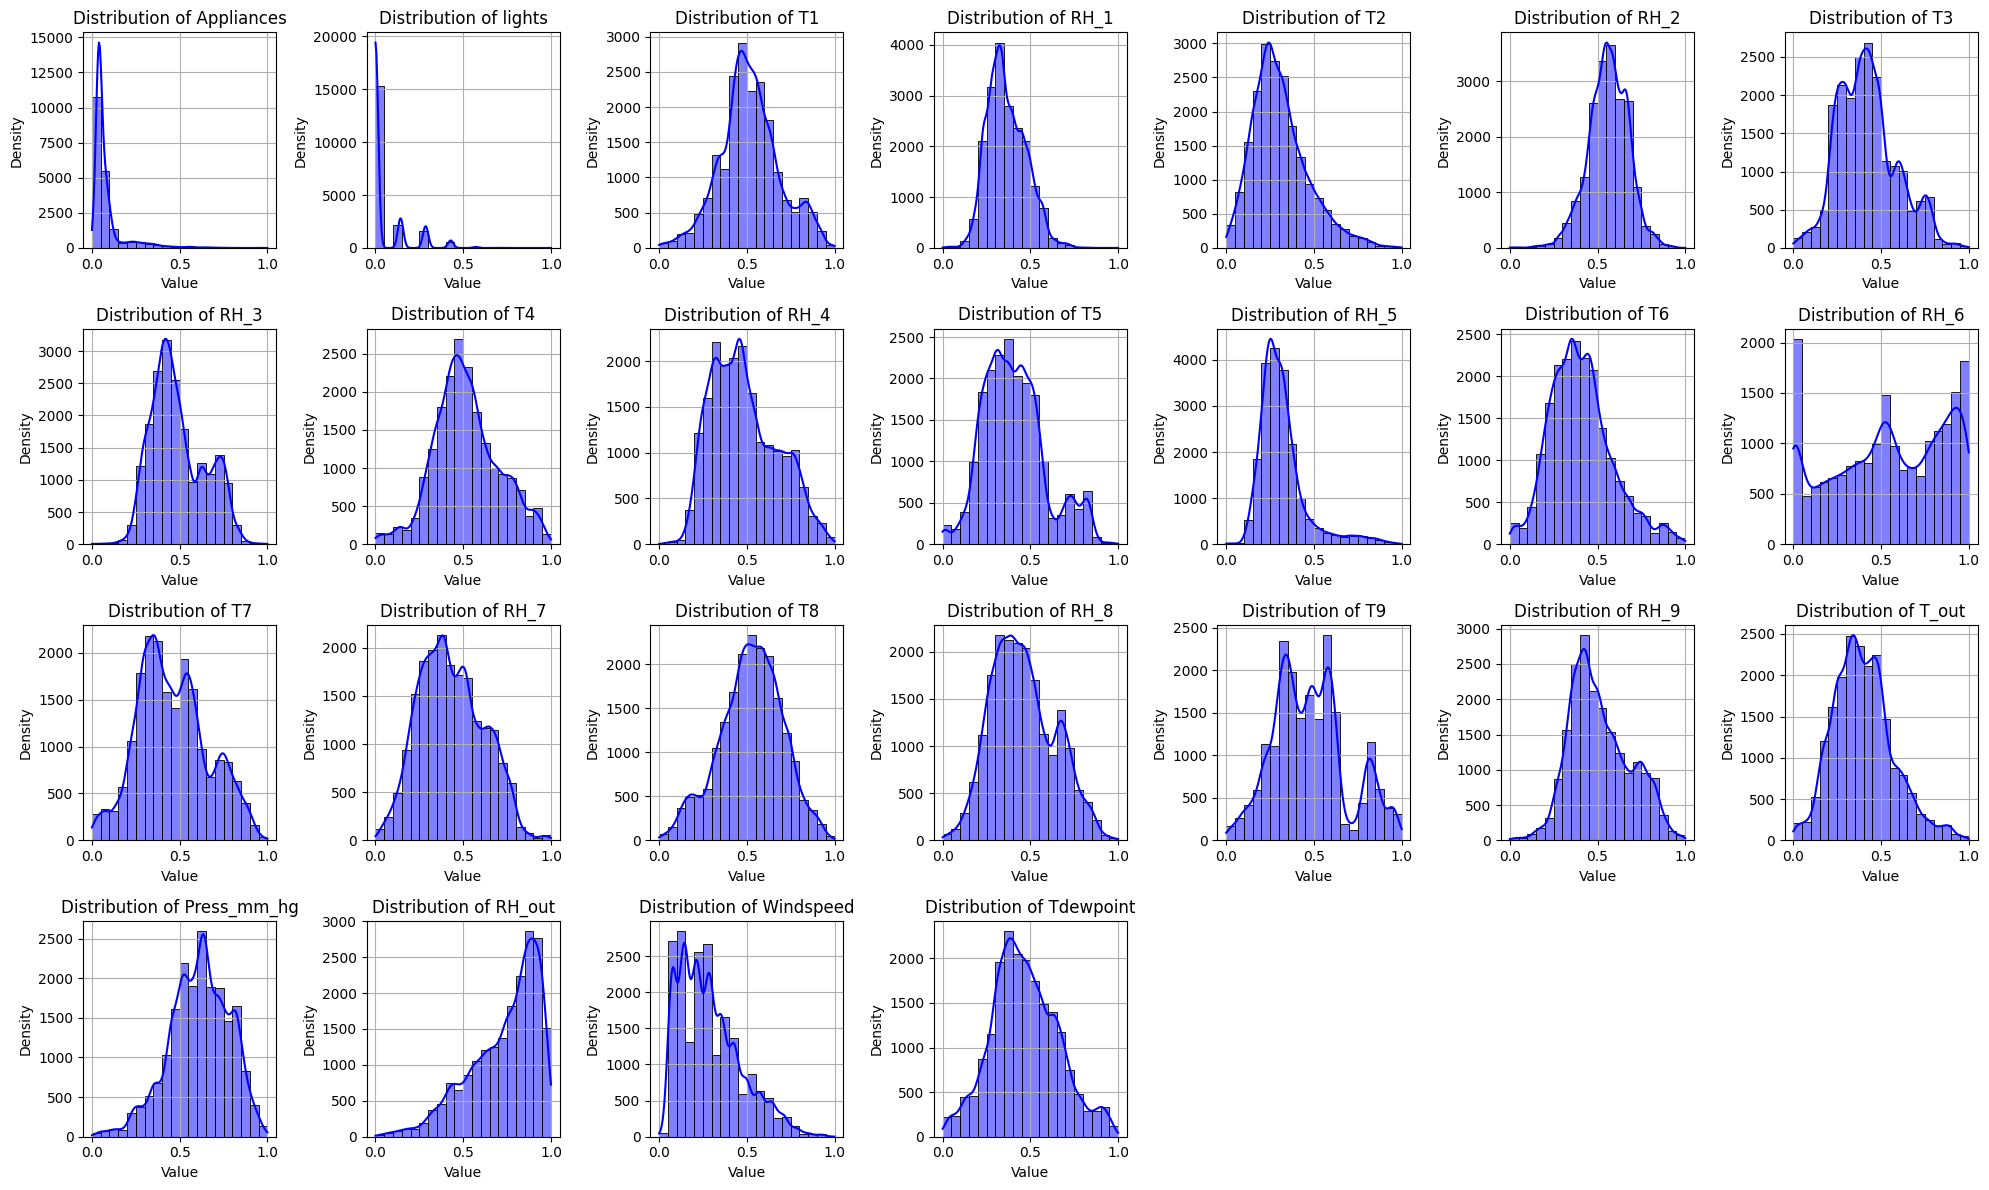

In [16]:
#Histogram plot of every individual column

num_columns = len(dataTrans.columns)
num_rows = math.ceil(num_columns / 7)

# Set up subplots
fig, axes = plt.subplots(num_rows, 7, figsize=(20, num_rows * 3))  # Adjust figsize as needed

# Generate distribution plots for each column
for i, column in enumerate(dataTrans.columns):
    row_num = i // 7
    col_num = i % 7
    ax = axes[row_num, col_num] if num_rows > 1 else axes[col_num]
    sns.histplot(dataTrans[column], bins=20, color='blue', kde=True, ax=ax)  # Using Seaborn's distplot
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.grid(True)

# Hide empty subplots
for i in range(num_columns, num_rows * 7):
    row_num = i // 7
    col_num = i % 7
    ax = axes[row_num, col_num] if num_rows > 1 else axes[col_num]
    ax.axis('off')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

### Removing Outliers

In [17]:
#eliminating outliers
Q1=dataTrans.quantile(0.25)
Q3 = dataTrans.quantile(0.75)
IQR = Q3-Q1

dataClean = dataTrans[~((dataTrans < (Q1-IQR * 1.5)) |(dataTrans > (Q3 + IQR*1.5)))]
dataClean.head()
dataClean.shape

(19735, 25)

### Boxplot After Removing Outliers

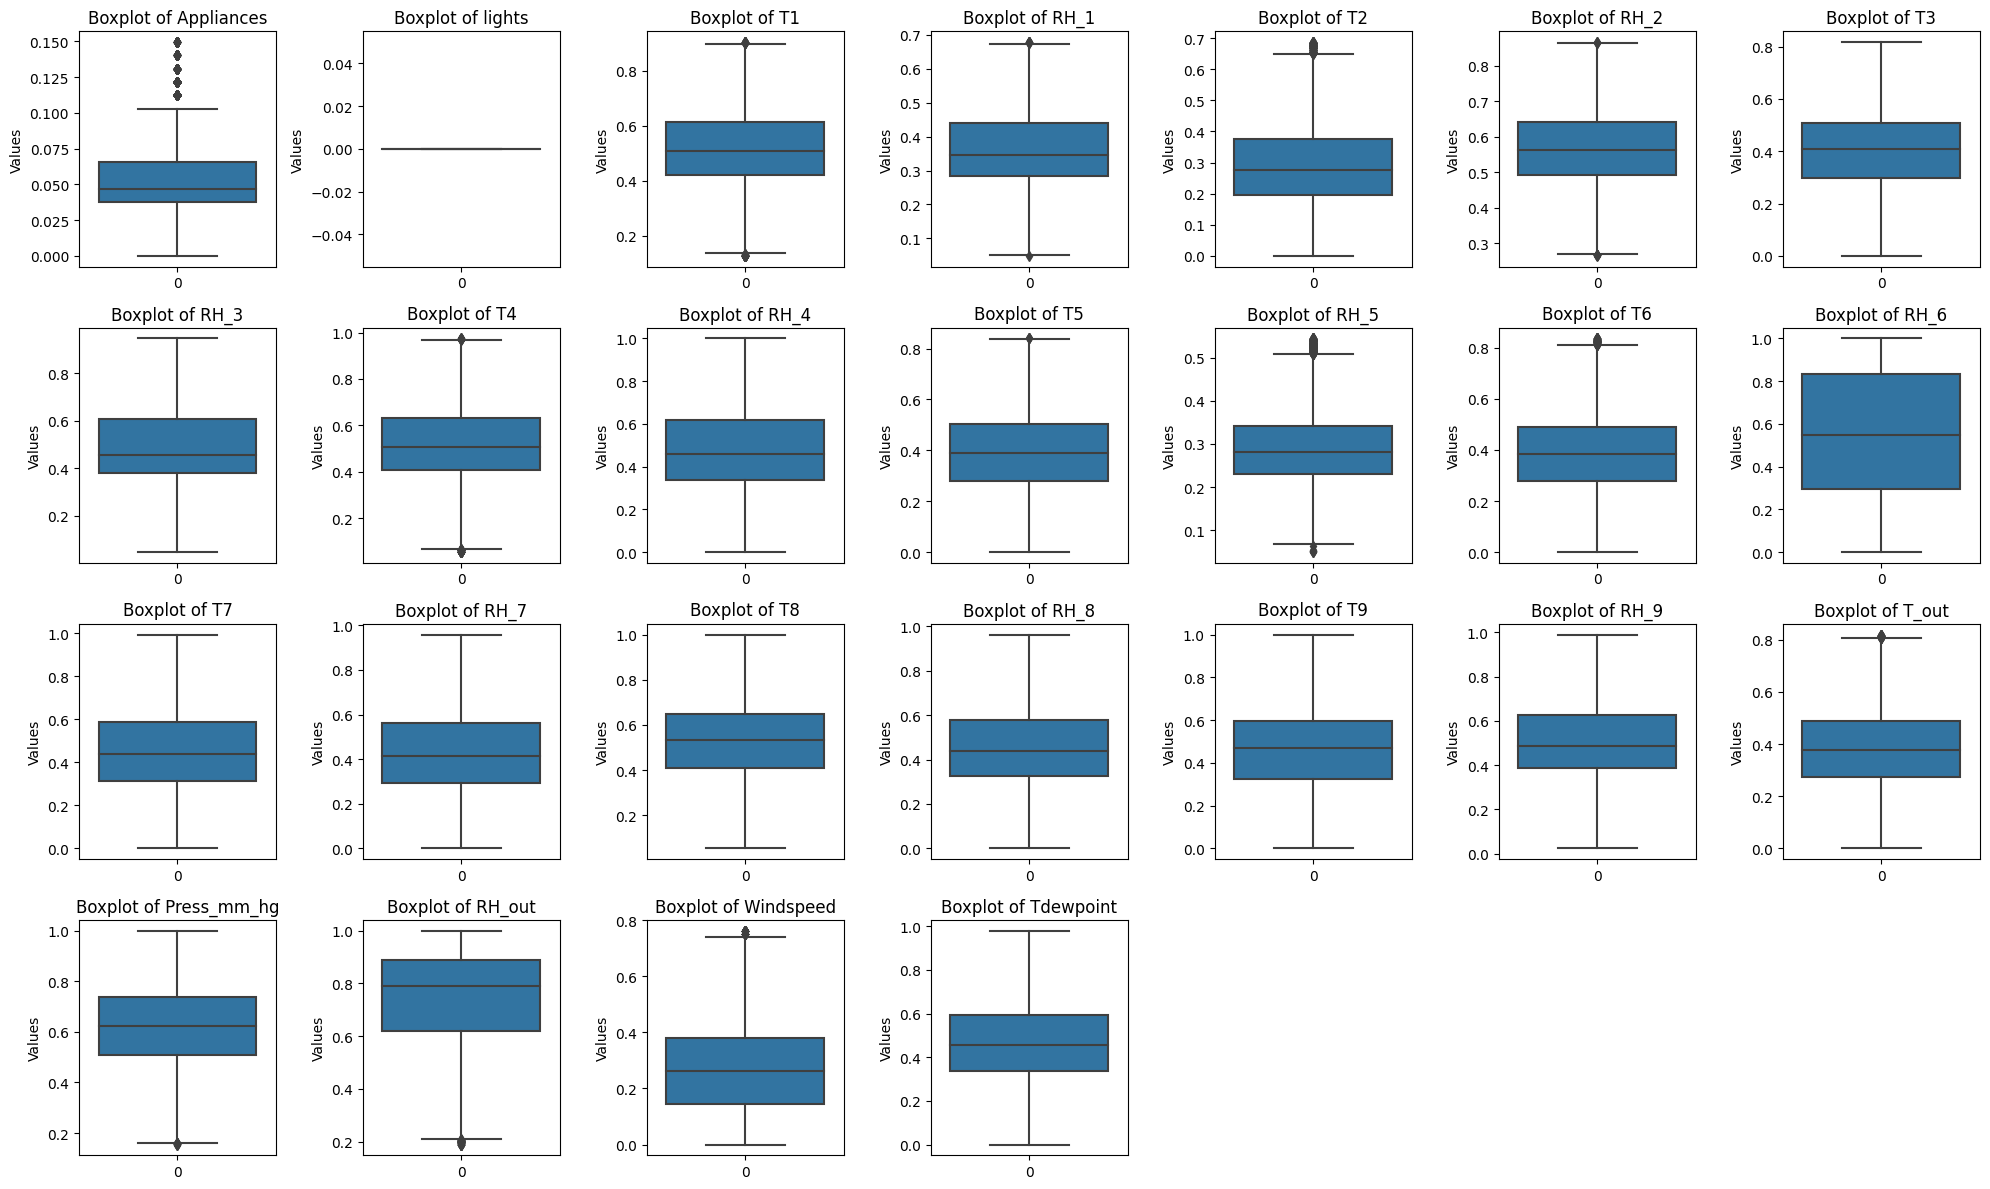

In [18]:
num_columns = len(dataClean.columns)
num_rows = math.ceil(num_columns / 7)

# Set up subplots
fig, axes = plt.subplots(num_rows, 7, figsize=(20, num_rows * 3))  # Adjust figsize as needed

# Generate box plots for each column
for i, column in enumerate(dataClean.columns):
    row_num = i // 7
    col_num = i % 7
    ax = axes[row_num, col_num] if num_rows > 1 else axes[col_num]
    sns.boxplot(data=dataClean[column], ax=ax)  # Using Seaborn's boxplot
    ax.set_title(f'Boxplot of {column}')
    ax.set_ylabel('Values')

# Hide empty subplots
for i in range(num_columns, num_rows * 7):
    row_num = i // 7
    col_num = i % 7
    ax = axes[row_num, col_num] if num_rows > 1 else axes[col_num]
    ax.axis('off')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Filling Missing Values

In [19]:
dataClean.isnull().sum()

Appliances     2138
lights         4483
T1              515
RH_1            146
T2              546
RH_2            235
T3              217
RH_3             15
T4              186
RH_4              0
T5              179
RH_5           1330
T6              513
RH_6              0
T7                2
RH_7             42
T8               79
RH_8             17
T9                0
RH_9             21
T_out           436
Press_mm_hg     219
RH_out          239
Windspeed       214
Tdewpoint        10
dtype: int64

### Imputing Data With 'mean'

In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
dataImp = pd.DataFrame(imputer.fit_transform(dataClean), columns=dataClean.columns)
dataImp.head()

Appliances  lights       T1      RH_1        T2      RH_2        T3  \
0    0.046729     0.0  0.32735  0.566187  0.225345  0.684038  0.215188   
1    0.046729     0.0  0.32735  0.541326  0.225345  0.682140  0.215188   
2    0.037383     0.0  0.32735  0.530502  0.225345  0.679445  0.215188   
3    0.037383     0.0  0.32735  0.524080  0.225345  0.678414  0.215188   
4    0.046729     0.0  0.32735  0.531419  0.225345  0.676727  0.215188   

       RH_3        T4      RH_4  ...      RH_7        T8      RH_8        T9  \
0  0.746066  0.351351  0.764262  ...  0.653428  0.173329  0.661412  0.223032   
1  0.748871  0.351351  0.782437  ...  0.651064  0.173329  0.660155  0.226500   
2  0.755569  0.344745  0.778062  ...  0.646572  0.173329  0.655586  0.219563   
3  0.758685  0.341441  0.770949  ...  0.641489  0.164175  0.650788  0.219563   
4  0.758685  0.341441  0.762697  ...  0.639362  0.164175  0.650788  0.219563   

       RH_9     T_out  Press_mm_hg    RH_out  Windspeed  Tdewpoint  
0  0.677290  0.372990     0.615662  0.894737   0.500000   0.538462  
1  0.678532  0.369239     0.615662  0.894737   0.476190   0.533937  
2  0.676049  0.365488     0.615662  0.894737   0.452381   0.529412  
3  0.671909  0.361736     0.615662  0.894737   0.428571   0.524887  
4  0.671909  0.357985     0.615662  0.894737   0.404762   0.520362  

[5 rows x 25 columns]

In [21]:
dataImp.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Tdewpoint      0
dtype: int64

# Feature Engineering

In [22]:
dataImp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  float64
 1   lights       19735 non-null  float64
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

In [23]:
date_column = dataSet['date']
dataImp = pd.concat([date_column, dataImp], axis=1)
dataImp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  float64
 2   lights       19735 non-null  float64
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [24]:
dataImp['date'] = pd.to_datetime(dataImp['date']).astype('datetime64[ns]')
dataImp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  float64       
 2   lights       19735 non-null  float64       
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [25]:
dataImp['month'] = dataImp['date'].dt.month.astype(int)
dataImp['day_of_month'] = dataImp['date'].dt.day.astype(int)
dataImp['year'] = dataImp['date'].dt.year.astype(int)
dataImp['hour_of_day'] = dataImp['date'].dt.hour.astype(int)
dataImp['day_of_week'] = dataImp['date'].dt.dayofweek.astype(int)

In [26]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
dataImp['day_name'] = dataImp['date'].dt.dayofweek.map(dayOfWeek)

In [27]:
grouped_date_df = dataImp.groupby('date') 
grouped_hour_df = dataImp.groupby('hour_of_day')
grouped_dayweek_df = dataImp.groupby('day_name',sort=False)

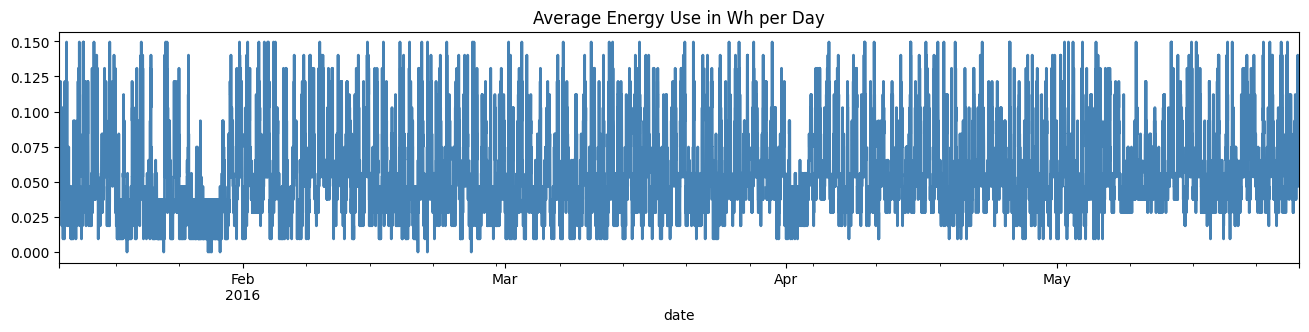

In [28]:
grouped_date_df['Appliances'].agg(np.mean).plot(linewidth=2,color='steelblue',title ="Average Energy Use in Wh per Day", figsize=(16, 3));

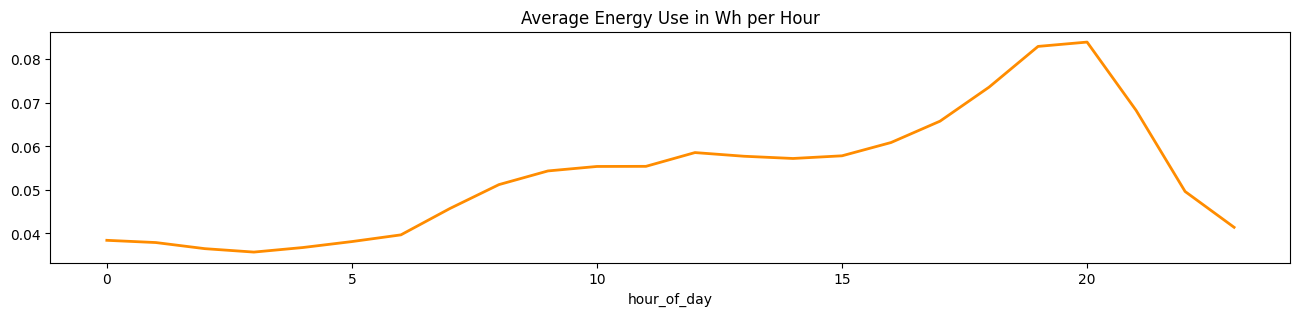

In [29]:
grouped_hour_df['Appliances'].agg(np.mean).plot(linewidth=2,color='darkorange',title ="Average Energy Use in Wh per Hour", figsize=(16, 3));

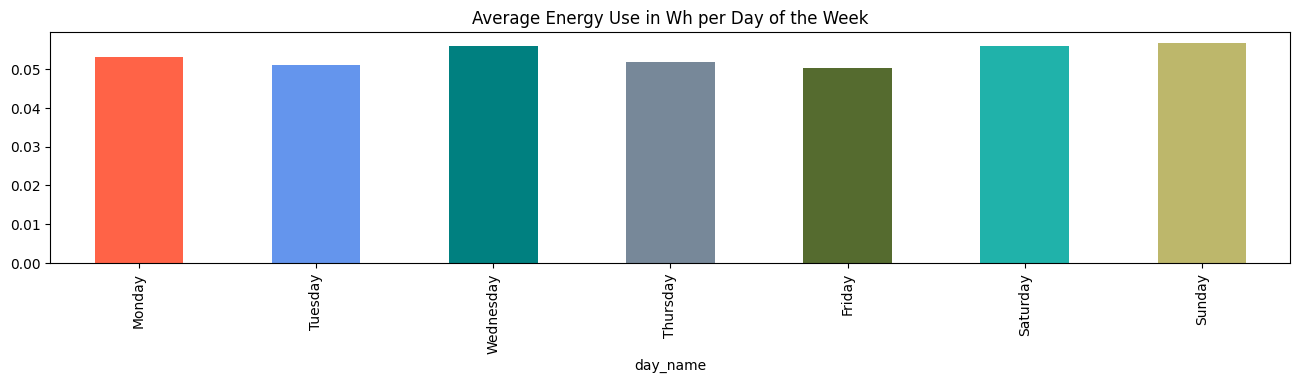

In [30]:
grouped_dayweek_df['Appliances'].agg(np.mean).plot(kind='bar', linewidth=2,color=['tomato','cornflowerblue','teal','lightslategrey','darkolivegreen','lightseagreen','darkkhaki'],title ="Average Energy Use in Wh per Day of the Week", figsize=(16, 3));

# Feature Selection